In [1]:

from cryoel_model import create_discrete_optimizer, optimizer, \
    generate_inital_pulses, discretize_pulses, n_digits_discrete_opt
import numpy as np
import matplotlib.pyplot as plt
import time
import os
from qopt import *

# root_folder = r"C:\Users\julia\Desktop\SimulationData\Cryoelectronics"
root_folder = r"D:\SimulationData\Cryoelectronics"


continuous_folder = os.path.join(root_folder, "ContinuousOptimization")
discrete_folder = os.path.join(root_folder, "DiscreteOptimization")

assert os.path.isdir(continuous_folder)
assert os.path.isdir(discrete_folder)

identifier = "2022_09_23_first_execution"


c_dir = os.path.join(continuous_folder, identifier)
d_dir = os.path.join(discrete_folder, identifier)

for x in [c_dir, d_dir]:
    if not os.path.isdir(x):
        os.mkdir(x)


n_processes = 50



# Create initial pulses

In [6]:
n_opt = 500  # Number of optimized pulses

# on the simulation PC:
# 50 processes
# a single discrete optimization should take about 10 min, much longer than the continuous one
# I want 300 runs for 6 digit numbers
print("Runtime in Hours: ")
print(500 * 6 / 50 * 10 / 60)

continuous_initial_pulses = generate_inital_pulses(n_opt=n_opt)


Runtime in Hours: 
10.0


# Continuous Optimization

Let's start with the continuous optimization.

In [3]:
continuous_optimizer = optimizer

data_continuous = run_optimization_parallel(
    optimizer=continuous_optimizer,
    initial_pulses=continuous_initial_pulses.transpose([2, 0, 1]),
    processes=n_processes
)

data_continuous.to_pickle(os.path.join(c_dir, "ContinuouslyOptimizedPulses"))

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Sum of Infidelitites'}, xlabel='Iteration', ylabel='Infidelity'>)

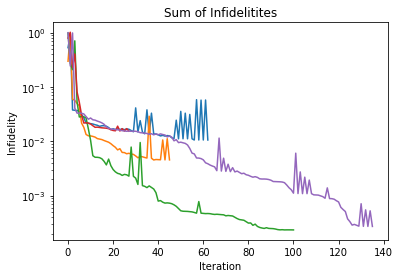

In [4]:
analyzer = Analyser(data_continuous)
analyzer.plot_absolute_costs()

# Discrete Optimization

Then we apply the discrete optimization.

In [3]:


for n_digits in n_digits_discrete_opt:
    start = time.time()
    integer_discrete_initial_pulses, discrete_initial_pulses = discretize_pulses(
        n_digits=n_digits, pulses=continuous_initial_pulses)
    discrete_optimizer = create_discrete_optimizer(n_digits=n_digits)
    data_discrete = run_optimization_parallel(
        optimizer=discrete_optimizer,
        initial_pulses=integer_discrete_initial_pulses.transpose([2, 0, 1]),
        processes=n_processes
    )
    data_discrete.to_pickle(os.path.join(d_dir, "AnnealedPulsesNDigits" + str(n_digits)))

    end = time.time()
    print("Discrete optimizations with the number of digits: " + str(n_digits))
    print(end - start)


596.0089147090912
